In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from textblob import TextBlob
import re

In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'EV6p8KSFnZCFm6MQemqhAtlzl'
CONSUMER_SECRET = 'jr6Bcy6ciThkwGlfuw2nfBOTiS5dGZtexcqbsZCHskXv7QZJqk'

# Access:
ACCESS_TOKEN  = '2268722353-80wej1GZNdECvjMAzHGuHY1Rer1YRGZhqNhYFdG'
ACCESS_SECRET = '5x5x1ZnarCKljy4cVoeA0BOy8L5dXOXoo3ulVcIamonaB'

## Exercises
1. Consider the tweets published in your own timeline (http://tweepy.readthedocs.io/en/v3.5.0/getting_started.html#hello-tweepy) and analyze their sentiments. This will help you capture with what content you get in touch with. Is it more positive-, neutral-, or negative-oriented?

2. Consider the last 100 tweets that contain a keyword of your interest (http://docs.tweepy.org/en/latest/api.html#API.search) and analyze the lenght of their tweets, and the number of likes and retweets, and their sentiments. How are the sentiments over the keyword distributed?

3. Consider the last 300 tweets that contain a location of your interest and analyze the lenght of their tweets, and the number of likes and retweets, and their sentiments. How are the sentiments of the users in that location?

4. When you mention another user (http://docs.tweepy.org/en/latest/api.html#API.mentions_timeline), with which sentiments do you do it?

5. Consider the last 200 tweets of two users you consider similar or relatable and compare the lenght of their tweets, and the number of likes and retweets. For each aspect we are considering (i.e., lenght, likes, and retwets) show one plot to compare the time series of those two users. Are the sentiments of the tweets of these two users distributed in similar ways?

6. Repeat exercise 5 with two users you consider very different (e.g., Donald Trump and Hillary Clinton). Be creative with the choices :)

7. Write a function to return if a tweet is more objective or subjective and run it in all the examples of the previous exercises (plus the Trump example we made during the class).

#### Exercise 1. Consider the tweets published in your own timeline (http://tweepy.readthedocs.io/en/v3.5.0/getting_started.html#hello-tweepy) and analyze their sentiments. This will help you capture with what content you get in touch with. Is it more positive-, neutral-, or negative-oriented?

In [3]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
data = pd.DataFrame(data=[tweet.text for tweet in public_tweets], columns=['Tweets'])

In [4]:
data.head()

,Tweets
0,.@akarl_smith spoke to Mark Cuban about his po...
1,#BatteryGate: How Apple secretly slowed down o...
2,The Lakers' big pre-draft trade got them a dra...
3,The Pentagon wants to put artificial intellige...
4,"RT @5liveSport: ''My phone goes, and Darren is..."


In [5]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [6]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data['Tweets'] ])

display(data.head(10))

,Tweets,SA
0,.@akarl_smith spoke to Mark Cuban about his po...,1
1,#BatteryGate: How Apple secretly slowed down o...,-1
2,The Lakers' big pre-draft trade got them a dra...,1
3,The Pentagon wants to put artificial intellige...,-1
4,"RT @5liveSport: ''My phone goes, and Darren is...",0
5,🤔⚽️ How were these 5️⃣ goals scored? 🎥 Test yo...,0
6,"""It's a brilliant idea.""\n\nA former NFL playe...",1
7,Elon Musk reportedly ran his secretive LA priv...,0
8,"RT @akarl_smith: Roy Moore, who still hasn't c...",1
9,RT @techinsider: These tubes might be the quic...,0


In [7]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 50.0%
Percentage of neutral tweets: 30.0%
Percentage de negative tweets: 20.0%


#### Exercise 2. Consider the last 100 tweets that contain a keyword of your interest (http://docs.tweepy.org/en/latest/api.html#API.search) and analyze the lenght of their tweets, and the number of likes and retweets, and their sentiments. How are the sentiments over the keyword distributed?

In [8]:
Champ_Leag =  api.search(q='Champions League', count =100)
data2 = pd.DataFrame(data=[tweet.text for tweet in Champ_Leag], columns=['Tweets'])

In [9]:
data2['len'] = np.array([len(tweet.text) for tweet in Champ_Leag])
data2['ID'] = np.array([tweet.id for tweet in Champ_Leag])
data2['Date'] = np.array([tweet.created_at for tweet in Champ_Leag])
data2['Source'] = np.array([tweet.source for tweet in Champ_Leag])
data2['Likes'] = np.array([tweet.favorite_count for tweet in Champ_Leag])
data2['RTs'] = np.array([tweet.retweet_count for tweet in Champ_Leag])

In [10]:
data2.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @Cr7Fran4ever: Cristiano Ronaldo vs Bayern ...,140,943939919587704832,2017-12-21 20:23:09,Twitter Web Client,0,1
1,Pattydearie's Blog: Champions League: Neymar t...,90,943939879955771393,2017-12-21 20:22:59,Twitter Web Client,0,0
2,RT @michaelrobinson: Desde el Barcelona dicen ...,140,943939876533268481,2017-12-21 20:22:58,Twitter for Android,0,336
3,Cristiano Ronaldo vs Bayern Múnich. Vuelta Cua...,140,943939873916022784,2017-12-21 20:22:58,Twitter Web Client,1,1
4,RT @mancitysmith: @ManCity last few weeks\n🔥 K...,139,943939860120899584,2017-12-21 20:22:54,Twitter for Android,0,7


In [11]:
print("The lenght's average in tweets: {}".format(np.mean(data2['len'])))

The lenght's average in tweets: 126.48


In [12]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data2['Likes'])
rt_max  = np.max(data2['RTs'])

fav = data2[data2.Likes == fav_max].index[0]
rt  = data2[data2.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data2['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data2['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data2['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data2['len'][rt]))

The tweet with more likes is: 
@ManCity last few weeks
🔥 KDB New Contract 
🔥 Jesus New Contract
🔥 Fernandinho New Contract
🔥 Last 16 Champions Lea… https://t.co/JsenS5cV3c
Number of likes: 26
140 characters.

The tweet with more retweets is: 
RT @realmadriden: 😎 #RealMadrid in 2017:
🏆 LaLiga
🏆 UEFA Champions League
🏆 UEFA Super Cup
🏆 Spanish Super Cup
🏆 FIFA Club World Cup https:…
Number of retweets: 16059
140 characters.



In [13]:
# We create a column with the result of the analysis:
data2['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data2['Tweets'] ])

pos_tweets = [ tweet for index, tweet in enumerate(data2['Tweets']) if data2['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data2['Tweets']) if data2['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data2['Tweets']) if data2['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data2['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data2['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data2['Tweets'])))

Percentage of positive tweets: 48.0%
Percentage of neutral tweets: 45.0%
Percentage de negative tweets: 7.0%


In [14]:
data2

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @Cr7Fran4ever: Cristiano Ronaldo vs Bayern ...,140,943939919587704832,2017-12-21 20:23:09,Twitter Web Client,0,1,0
1,Pattydearie's Blog: Champions League: Neymar t...,90,943939879955771393,2017-12-21 20:22:59,Twitter Web Client,0,0,1
2,RT @michaelrobinson: Desde el Barcelona dicen ...,140,943939876533268481,2017-12-21 20:22:58,Twitter for Android,0,336,1
3,Cristiano Ronaldo vs Bayern Múnich. Vuelta Cua...,140,943939873916022784,2017-12-21 20:22:58,Twitter Web Client,1,1,0
4,RT @mancitysmith: @ManCity last few weeks\n🔥 K...,139,943939860120899584,2017-12-21 20:22:54,Twitter for Android,0,7,1
5,"RT @brfootball: Two days until El Clasico, two...",111,943939860024516608,2017-12-21 20:22:54,Twitter for Android,0,131,1
6,But #MasterchefUK is not a league with bonus p...,131,943939837765308417,2017-12-21 20:22:49,Twitter Web Client,0,0,0
7,RT @odragao1893: A época natalicia vai ser azu...,140,943939815027957760,2017-12-21 20:22:44,Twitter for Android,0,24,0
8,"RT @brfootball: Two days until El Clasico, two...",111,943939800280846337,2017-12-21 20:22:40,Tech News Twitter AIL,0,131,1
9,RT @LiamPaulCanning: Premier League gap seems ...,139,943939794840690688,2017-12-21 20:22:39,Twitter for Android,0,210,-1


#### Exercise 3. Consider the last 300 tweets that contain a location of your interest and analyze the lenght of their tweets, and the number of likes and retweets, and their sentiments. How are the sentiments of the users in that location?

In [38]:
Barcelona =  api.search(geocode ='Paris', count =300)
data3 = pd.DataFrame(data=[tweet.text for tweet in Barcelona], columns=['Tweets'])

In [39]:
data3['len'] = np.array([len(tweet.text) for tweet in Barcelona])
data3['ID'] = np.array([tweet.id for tweet in Barcelona])
data3['Date'] = np.array([tweet.created_at for tweet in Barcelona])
data3['Source'] = np.array([tweet.source for tweet in Barcelona])
data3['Likes'] = np.array([tweet.favorite_count for tweet in Barcelona])
data3['RTs'] = np.array([tweet.retweet_count for tweet in Barcelona])

In [40]:
data3.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,GEOCODE: paris https://t.co/pPqKEib86R +1 geocode,49,940975064866058241,2017-12-13 16:01:52,Find Lat Lng,0,0
1,"GEOCODE: Paris, France https://t.co/A5MyeEFdMf...",58,940691827811856385,2017-12-12 21:16:23,Find Lat Lng,0,0
2,GEOCODE: paris https://t.co/cLkyoi6utP +2 geoc...,50,940670710753701889,2017-12-12 19:52:28,Find Lat Lng,0,0
3,GEOCODE: Paris https://t.co/BDY8ukdFu2,38,940645599745110019,2017-12-12 18:12:41,Find Lat Lng,0,0
4,GEOCODE: paris https://t.co/1Kf6WTUT74 +5 geoc...,50,940529246640005120,2017-12-12 10:30:21,Find Lat Lng,0,0


In [41]:
print("The lenght's average in tweets: {}".format(np.mean(data3['len'])))

The lenght's average in tweets: 49.0


In [42]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data3['Likes'])
rt_max  = np.max(data3['RTs'])

fav = data3[data3.Likes == fav_max].index[0]
rt  = data3[data3.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data3['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data3['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data3['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data3['len'][rt]))

The tweet with more likes is: 
GEOCODE: paris https://t.co/pPqKEib86R +1 geocode
Number of likes: 0
49 characters.

The tweet with more retweets is: 
GEOCODE: paris https://t.co/pPqKEib86R +1 geocode
Number of retweets: 0
49 characters.



In [43]:
# We create a column with the result of the analysis:
data3['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data3['Tweets'] ])

pos_tweets = [ tweet for index, tweet in enumerate(data3['Tweets']) if data3['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data3['Tweets']) if data3['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data3['Tweets']) if data3['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data3['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data3['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data3['Tweets'])))

Percentage of positive tweets: 0.0%
Percentage of neutral tweets: 100.0%
Percentage de negative tweets: 0.0%


#### 4. When you mention another user (http://docs.tweepy.org/en/latest/api.html#API.mentions_timeline), with which sentiments do you do it?

#### 5. Consider the last 200 tweets of two users you consider similar or relatable and compare the lenght of their tweets, and the number of likes and retweets. For each aspect we are considering (i.e., lenght, likes, and retwets) show one plot to compare the time series of those two users. Are the sentiments of the tweets of these two users distributed in similar ways?

In [ ]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [72]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets_dalai = extractor.user_timeline(screen_name="Pontifex", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets_neta)))

tweets_pope = extractor.user_timeline(screen_name="DalaiLama", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets_erdog)))

Number of tweets extracted: 200.

Number of tweets extracted: 200.



In [73]:
data5_1 = pd.DataFrame(data=[tweet.text for tweet in tweets_pope], columns=['Tweets'])
data5_2 = pd.DataFrame(data=[tweet.text for tweet in tweets_dalai], columns=['Tweets'])

In [75]:
data5_1['len'] = np.array([len(tweet.text) for tweet in tweets_pope])
data5_1['ID'] = np.array([tweet.id for tweet in tweets_pope])
data5_1['Date'] = np.array([tweet.created_at for tweet in tweets_pope])
data5_1['Source'] = np.array([tweet.source for tweet in tweets_pope])
data5_1['Likes'] = np.array([tweet.favorite_count for tweet in tweets_pope])
data5_1['RTs'] = np.array([tweet.retweet_count for tweet in tweets_pope])

data5_2['len'] = np.array([len(tweet.text) for tweet in tweets_dalai])
data5_2['ID'] = np.array([tweet.id for tweet in tweets_dalai])
data5_2['Date'] = np.array([tweet.created_at for tweet in tweets_dalai])
data5_2['Source'] = np.array([tweet.source for tweet in tweets_dalai])
data5_2['Likes'] = np.array([tweet.favorite_count for tweet in tweets_dalai])
data5_2['RTs'] = np.array([tweet.retweet_count for tweet in tweets_dalai])

In [76]:
tlen_p = pd.Series(data=data5_1['len'].values, index=data5_1['Date'])
tfav_p = pd.Series(data=data5_1['Likes'].values, index=data5_1['Date'])
tret_p = pd.Series(data=data5_1['RTs'].values, index=data5_1['Date'])

tlen_d = pd.Series(data=data5_2['len'].values, index=data5_2['Date'])
tfav_d = pd.Series(data=data5_2['Likes'].values, index=data5_2['Date'])
tret_d = pd.Series(data=data5_2['RTs'].values, index=data5_2['Date'])

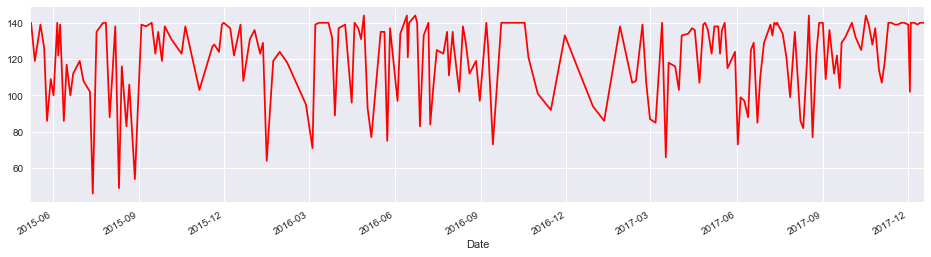

In [77]:
tlen_p.plot(figsize=(16,4), color='r');

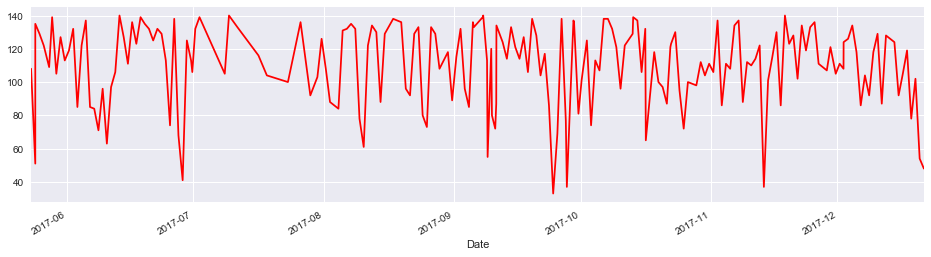

In [78]:
tlen_d.plot(figsize=(16,4), color='r');

#### 6. Repeat exercise 5 with two users you consider very different (e.g., Donald Trump and Hillary Clinton). Be creative with the choices :)

In [47]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets_neta = extractor.user_timeline(screen_name="netanyahu", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets_neta)))

tweets_erdog = extractor.user_timeline(screen_name="RT_Erdogan", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets_erdog)))

Number of tweets extracted: 200.

Number of tweets extracted: 200.



In [50]:
data6_1 = pd.DataFrame(data=[tweet.text for tweet in tweets_neta], columns=['Tweets'])
data6_2 = pd.DataFrame(data=[tweet.text for tweet in tweets_erdog], columns=['Tweets'])

In [54]:
data6_1['len'] = np.array([len(tweet.text) for tweet in tweets_neta])
data6_1['ID'] = np.array([tweet.id for tweet in tweets_neta])
data6_1['Date'] = np.array([tweet.created_at for tweet in tweets_neta])
data6_1['Source'] = np.array([tweet.source for tweet in tweets_neta])
data6_1['Likes'] = np.array([tweet.favorite_count for tweet in tweets_neta])
data6_1['RTs'] = np.array([tweet.retweet_count for tweet in tweets_neta])

data6_2['len'] = np.array([len(tweet.text) for tweet in tweets_erdog])
data6_2['ID'] = np.array([tweet.id for tweet in tweets_erdog])
data6_2['Date'] = np.array([tweet.created_at for tweet in tweets_erdog])
data6_2['Source'] = np.array([tweet.source for tweet in tweets_erdog])
data6_2['Likes'] = np.array([tweet.favorite_count for tweet in tweets_erdog])
data6_2['RTs'] = np.array([tweet.retweet_count for tweet in tweets_erdog])

In [62]:
data6_1.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,Thank you President Trump and Ambassador Haley...,140,943869845040517120,2017-12-21 15:44:41,Twitter for iPhone,13279,4734
1,מדינת ישראל דוחה על הסף את ההצבעה באו״ם - עוד ...,140,943791570809163777,2017-12-21 10:33:39,Twitter for iPhone,1155,274
2,משימתו הראשונה של יו״ר הקואליציה @dudiamsalem ...,126,943539316252463105,2017-12-20 17:51:17,Twitter for iPhone,1092,155
3,"בעוד כמה חודשים, כשכל האמת תצא לאור - יתברר לכ...",125,943227627682267136,2017-12-19 21:12:45,Twitter for iPhone,1380,266
4,חג חנוכה שמח!\nhappy hanukkah! https://t.co/xY...,53,942860070471249925,2017-12-18 20:52:12,Twitter for iPhone,4238,772


In [68]:
tlen_n = pd.Series(data=data6_1['len'].values, index=data6_1['Date'])
tfav_n = pd.Series(data=data6_1['Likes'].values, index=data6_1['Date'])
tret_n = pd.Series(data=data6_1['RTs'].values, index=data6_1['Date'])

tlen_e = pd.Series(data=data6_2['len'].values, index=data6_2['Date'])
tfav_e = pd.Series(data=data6_2['Likes'].values, index=data6_2['Date'])
tret_e = pd.Series(data=data6_2['RTs'].values, index=data6_2['Date'])

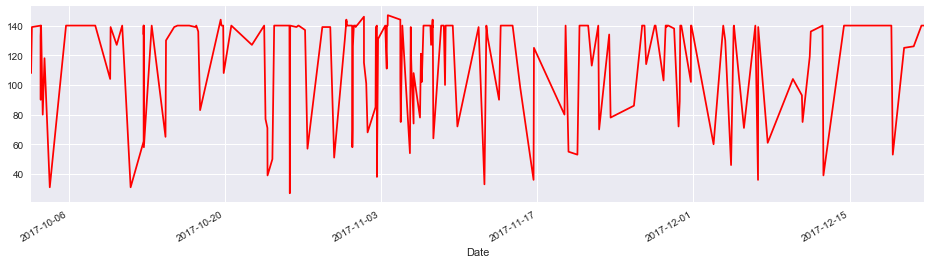

In [70]:
tlen_n.plot(figsize=(16,4), color='r');

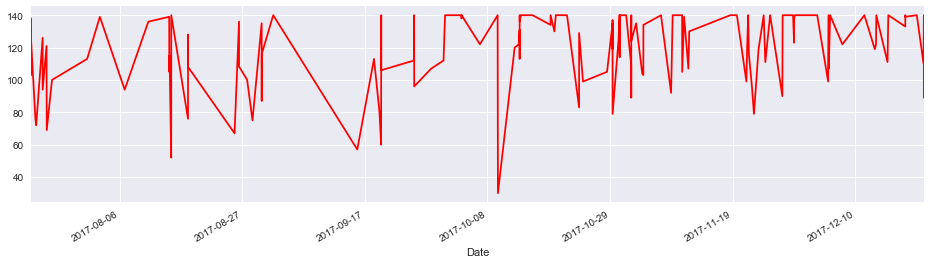

In [71]:

tlen_e.plot(figsize=(16,4), color='r');